# Basic algorithms in a simple two-period model


### Goal of this Lecture

- Understand the basic algorithms for dynamic optimization (consumption-savings) problems using the simplest possible problem — a two-period consumption–saving model.
- Understand the advantages and disadvantages of each algorithm.  
- Be able to write and implement code for these algorithms on a computer.

### Motivation: why a computational approach to dynamic problems?

Think about a J-period lifecycle model in which:
- Household chooses consumption $c_j$ and next period's asset position (saving) $a_{j+1}$, given an age-dependent income $z(j)$, where $j$ denotes age.  
- They derive instantaneous utility from consumption according to utility function $u(c_j)$ and discount future by $\beta$.  
- The asset earns a net interest rate of $r$, which is constant.  
- Budget constraint: $c_j + a_{j+1} = (1+r)a_{j} + z(j)$  
- Suppose that households have no asset at age $j=1$.

The objective function reads as:

$$
    \max_{\{a_{j+1}\}_{j=1}^{J-1}} \sum_{j=1}^J \beta^{j-1} u((1+r)a_{j} + z(j) - a_{j+1})
$$

What are the solutions? Consumption and asset profiles ($\{c_{j}\}_{j=1}^J, \{a_{j+1}\}_{j=1}^{J-1}$) (recall that $a_1=0$ is given).

How to solve the problem analytically? The first-order conditions and budget constraint:

$$
    u'(c_j) = \beta (1+r) u'(c_{j+1}) ~~~ \forall j=1,...,J-1
$$
and
$$
    c_j + a_{j+1} = (1+r)a_{j} + z(j) ~~~ \forall j=1,...,J 
$$

How many unknowns do we have?

$-$ 2J-1

How many equations do we have?

$-$ 2J-1. We can solve the problem by solving 2J-1 equations. 

It might be fine if the model is simple enough (e.g., a two-period model where $J=2$). But what if you want to:

- consider a full life-cycle model with, say, $J = 80$?  
- introduce additional choice variables (e.g., labor supply, education, etc.)?  
- include more state variables beyond age (e.g., education, gender, etc.)?  
- incorporate risk (e.g., income risk, unemployment risk, etc.)?  

---

Then we would have to solve too many (and often complex) equations, which is not realistic to do by hand!

### Starting from a two-period model

Consider a two-period model in which households choose consumption and saving given their income $z$. Define the value function for households with income $z$ as follows:

$$
V(z) = \max_{c_0,c_1>0} ~ \ln(c_0) + \beta\ln(c_1)
$$
subject to:
$$
c_0 + a = z\\
c_1 = (1+r)a
$$

Our goal is to derive the value function and policy functions for savings and consumption:
$$
a(z) = \argmax \{ \ln(z-a) + \beta\ln((1+r)a) \}
$$
and
$$
c(z) = (1+r)a(z) 
$$

In this simple case, we can derive it analytically:

$$
a(z) = \frac{\beta}{1+\beta} z
$$

But obtaining closed-form solutions is typically infeasible when the model becomes more complex.

How can we solve it computationally? We will cover three methods:
1. Grid Search
2. Endogenous Grid Method (EGM)
3. Projection Method

## Method 1: Grid Search
### Basic idea

1. Discretize the space over state and choice variables. In this case, the state variable is income $z$, and the choice variable is asset position $a$. Discretize the space of $z$, $\mathcal{Z}=\{z_1,...,z_{n_z}\}$ and that of $a$, $\mathcal{A}=\{a_1,...,a_{n_a}\}$.
2. For each grid point of state variable (i.e., for each $z\in\mathcal{Z}$), compute the utility for all grid points of the choice variable (i.e., for each $a\in\mathcal{A}$). Then find $a^*\in\mathcal{A}$ that maximizes utility given $z\in\mathcal{Z}$.

In other words, we search for the optimal choice at each grid point, which is why this method is referred to as Grid Search.

### Procedure
- Set parameters (i.e., discount factor and interest rate). Here, set $\beta=0.98$ and $r=0.02$. 
- Discretize the income and asset spaces. For asset space, set 1000 grid points over $[1.e-5, 2.0]$. Store it as a vector called grida. For income space, set 1000 grid points over $[1.0, 2.0]$. Store it as a vector called gridz.
- Prepare vectors for value and policy functions, as well as a matrix to compute the utility value of each pair of $(a,z)$.
- Solve the problem: for each $z$ in gridz, compute the utility when the asset position is given by $a$ in grida (using a for loop). After computing the utility value for each pair of $(a,z)$, find $a$ that maximizes the utility given $z$ and store the results in the value and policy functions.
- Plot the policy function over the $(z,a)$ plane. Also plot the analytical result on the same figure to see if your computation is correct.

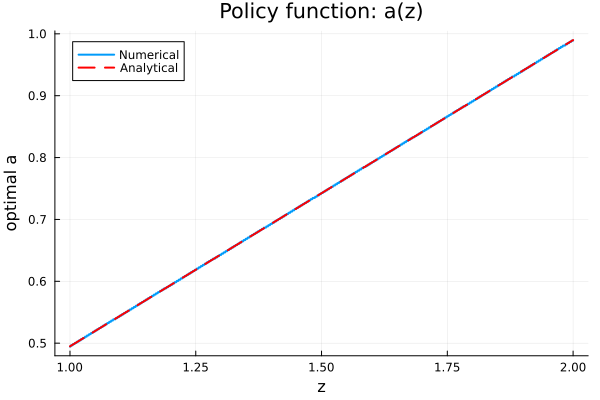

In [ ]:
## Code
using Plots # for plotting results

## set parameters
β=0.98 # discount factor
r=0.02 # interest rate

## discretize asset and income space
mina = 1.e-5 # lower bound for asset (a_1)
maxa = 2.0   # upper bound for asset (a_{n_a})
na   = 1000  # number of grid points

minz = 1.0  # lower bound for income (z_1)
maxz = 2.0  # upper bound for income (z_{n_z})
nz   = 1000 # number of grid points

grida = collect(LinRange(mina,maxa,na)); # obtain asset space \mathcal{A}
gridz = collect(LinRange(minz,maxz,nz)); # obtain income space \mathcal{Z}

Vaz = zeros(na,nz) # To store utility with a, given z, in doing grid search.
Vz = zeros(nz) # Value function V(z)
az = zeros(nz) # Policy function a(z)
az_ana = zeros(nz) # Analytical solution for policy function a(z) (for comparison).
penalty=-1.e+8 # To punish choice of a that results in c\le 0. See below.
for zc in eachindex(gridz) # for each grid point of z
for ac in eachindex(grida) # for each grid point of a
    c0=gridz[zc]-grida[ac] # compute implied consumption (today)
    c1=(1.0+r)*grida[ac]   # compute implied consumption (tomorrow)
    if (c0>0 && c1>0) # consumption needs to be positive
        Vaz[ac,zc] = log(c0)+β*log(c1)
    else # otherwise "punish" such choice not to be chosen as an optimal one.
        Vaz[ac,zc] = penalty
    end
end # finish computing utility with each a, given z.
arga = argmax(Vaz[:,zc]) # compute argmax a
az[zc] = grida[arga] # store optimal asset position given z (= policy function)
Vz[zc] = Vaz[arga,zc] # store maximized utility given z (= value function)
az_ana[zc] = β/(1.0+β) * gridz[zc] # analytical result
end

# Used in the following exercise
# Deviation = sum(abs.(az.-az_ana)./az_ana)/na;
# DeviationRounded = round(Deviation * 100, digits=5)
# println("Average Deviation: ", DeviationRounded, "%")

## plot results
plot(gridz, az, xlabel="z", ylabel="optimal a", title="Policy function: a(z)", lw=2, label="Numerical")
plot!(gridz, az_ana, lw=2, ls=:dash, color=:red, label="Analytical")


# Exercise

1. Replicate the above results by yourself.
2. Construct a function (named, e.g., solve_model) to make it easier to change parameter values, especially the number of grid points.
3. Try different values for the number of grid and see how they differ in accuracy (i.e., distance from the "true," analytical solution) and in computational time. For example, choose the numbers for na and nz from {10,100,1000,1000}. What are the differences between na=nz=1000 and na=nz=100, or na=nz=1000 and na=nz=10000?

## Method 2: Endogenous Grid Method

Endogenous grid method (EGM) can be used when the choice variable is continuous. The basic idea is as follows. Recall that the first-order condition is given as:

$$
u'(c_0) = \beta(1+r)u'((1+r)a)
$$

If the inverse of the function $u'$, $(u')^{-1}(\cdot)$, exists, this reads:

$$
c_0 = (u')^{-1}(\beta(1+r)u'((1+r)a))
$$

The EGM discretize the choice variable $a$ and compute consumption for each $c_0$, which (endogenously) pins down $z$ as well because $c_0+a=z$ from the budget constraint. Given that the grid for the state variable is endogenously determined, this is called endogenous grid method.

If we consider that $u(c)=\ln(c)$, given $a$, $c_0$ is given as:

$$
c_0 = \frac{(1+r)a}{\beta(1+r)} = a/\beta,
$$
which pins down the grid for the labor productivity as
$$
z = a/\beta + a = \frac{1+\beta}{\beta}a.
$$
Given that $(c_0,a)$ characterize the optimal choices with $z$, $a$ can also be written as a function of $z$.

### Procedure
- Set parameters (i.e., discount factor and interest rate). Set $\beta=0.98$ and $r=0.02$. 
- Discretize the asset spaces. Set 1000 grid points over $[1.e-5, 2.0]$. Store it as a vector called grida.
- Pin down $c_0$, which endogenously determine the grid points for $z$.
- Plot the policy function for asset over the $(z,a)$ plane. Also plot the analytical result on the same figure to see if your computation is correct.


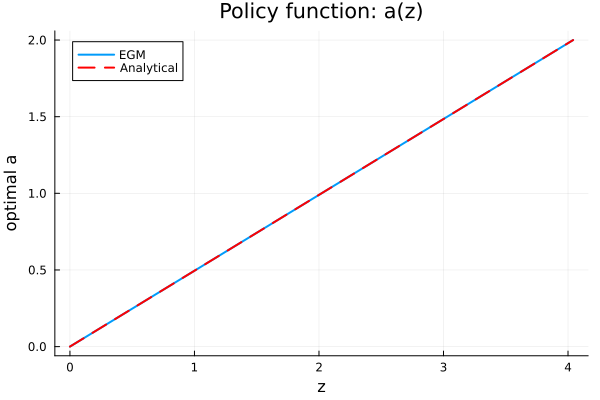

In [ ]:
using Plots

## set parameters
β=0.98 # discount factor
r=0.02 # interest rate

# discretization
mina = 1.e-5
maxa = 2.0
na   = 10000
nz   = na

grida = collect(LinRange(mina,maxa,na));
gridz = zeros(nz);

c0     = grida./β;
gridz  = c0 .+ grida;
az_egm = gridz .- c0;

az_ana = β ./ (1.0 + β) .* gridz;  # analytical solution

plot(gridz, az_egm, xlabel="z", ylabel="optimal a", title="Policy function: a(z)", lw=2, label="EGM")
plot!(gridz, az_ana, lw=2, ls=:dash, color=:red, label="Analytical")

Questions: What are the advantages and disadvantages of grid search and the EGM? One is more versatile than the other, and the other is faster than the first. Which is which?

## Method 3: Projection Method

This methodology approximates the policy function parametrically:

$$
a(z) \simeq \tilde{a}(z;\bm{\theta}) \equiv \sum_{i=0}^M \theta_mz^m,
$$
where $\bm{\theta}=(\theta_0,...,\theta_M)$.

Note that optimal choices on savings (i.g., policy function $a(z)$) satisfies the first-order condition:
\begin{align*}
    u'(z-\tilde{a}(z;\bm{\theta})) &= \beta(1+r)u'((1+r)\tilde{a}(z;\bm{\theta})) \\
    \Leftrightarrow \underbrace{\beta(1+r)\frac{u'((1+r)\tilde{a}(z;\bm{\theta}))}{u'(z-\tilde{a}(z;\bm{\theta}))}-1}_{\equiv R(\bm{\theta})} &= 0
\end{align*}

$R(\bm{\theta})$ is a residual function. What we do is to find $\bm{\theta}$ that minimizes the residual function and that approximates the solution well. In finding such parameters, we can use a built-in optimization routine in Julia. 

If a ``true'' policy function looks more complicated or shows a strong non-linearity, then finding optimal parameters may take longer time. We do not know which order is appropriate ex-ante. We can try from lower order to higher, or we can make a guess from the functional form. 

  1.633008 seconds (11.40 M allocations: 575.679 MiB, 4.86% gc time, 99.69% compilation time)
Estimated parameters: [5.734329891039185e-18, 0.494949494949495, -1.1171467793259903e-17]
True coefficient is: 0.494949494949495
Computed coefficient: 0.494949494949495


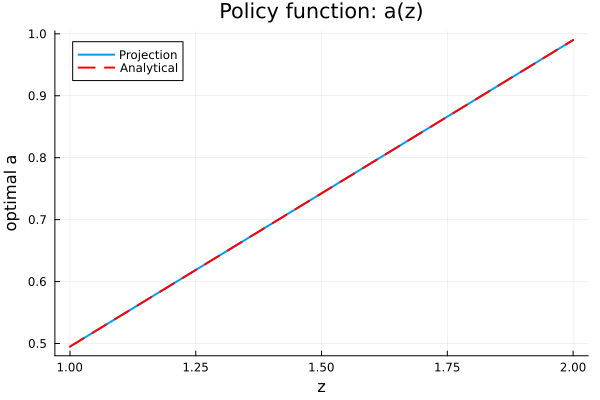

In [3]:
using Plots

## set parameters
β=0.98 # discount factor
r=0.02 # interest rate

# discretization
minz = 1.0
maxz = 2.0
nz   = 1000

gridz = collect(LinRange(minz,maxz,nz));

function residual(params)
    a, b, c = params
    denom = (1.0 + r) .* (a .+ b .* gridz .+ c.*gridz.^2)
    numer = gridz .- (a .+ b .* gridz .+ c.*gridz.^2)
    return (1.0 .+ r) .* β .* (numer ./ denom) .- 1
end

using LeastSquaresOptim
x0 = [0.0, 0.1, 0.0]  # initial guess for [a, b, c]. Be careful: setting x0=0 causes some problem as it results in division by zero and can't find the solution. so be careful. 

@time res = LeastSquaresOptim.optimize(residual, x0, Dogleg())

println("Estimated parameters: ", res.minimizer)
println("True coefficient is: ", β/(1.0+β))
println("Computed coefficient: ", res.minimizer[2])

a, b, c = res.minimizer
a_project = a .+ b .* gridz  .+ c .* gridz.^2;
az_ana = β ./ (1.0 + β) .* gridz;  # analytical solution

plot(gridz, a_project, xlabel="z", ylabel="optimal a", title="Policy function: a(z)", lw=2, label="Projection")
plot!(gridz, az_ana, lw=2, ls=:dash, color=:red, label="Analytical")